# Method 1

Noise filtering and then debluring the given transmitted signal y[n]

In [24]:
# importing required libraries for basic mathematics and manipulation

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [25]:
#reads the csv and stores it in a dataframe

df = pd.read_csv('data.csv')

In [26]:
#displays first five rows
df.head()

,x[n],y[n]
0,35.4312,33.3735
1,35.1511,34.3744
2,34.8284,35.7514
3,34.4656,35.5869
4,34.0656,36.0826


In [27]:
# removing headers
df = df.rename(columns={col: "" for col in df})
df.head()

,,
0,35.4312,33.3735
1,35.1511,34.3744
2,34.8284,35.7514
3,34.4656,35.5869
4,34.0656,36.0826


In [28]:
# converting data into 1D lists
x = df.iloc[:,0]
y = df.iloc[:,1]
y.head()

0    33.3735
1    34.3744
2    35.7514
3    35.5869
4    36.0826
Name: , dtype: float64

In [29]:
# converts to numpy array which supports complex number manipulation
x = np.array(x)
y = np.array(y)

# Representation of initial signals
The orange plot represents original signal x[n] and blue plot represents transmitted signal y[n]

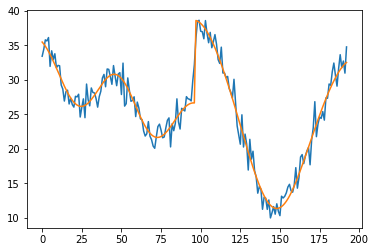

In [30]:
plt.plot(range(0,193),y)
plt.plot(range(0,193),x)

Step 1 : Removng noise by using moving averages

In [31]:

window_size = 5       # indicates that we are taking average of 5 consecutive samples

i = 0
y_denoised = []

while i < len(y) - window_size + 1:                   # while loop used untill the array ends, shifts the window by 
                                                      # one unit everytime the loop runs 
    
    this_window = y[i : i + window_size]


    window_average = sum(this_window) / window_size
    y_denoised.append(window_average)
    i += 1

y_denoised.insert(-2,(y[-2]+y[-3]+y[-4])/3)           # we fall short of 4 values when window size is 5 and we add them 
y_denoised.insert(-1,(y[-1]+y[-2]+y[-3])/3)           # manually by using the same method but averaging 3 values to ensure
                                                      # minimum deviation at the edges

y_denoised.insert(0,(y[0]+y[1]+y[2])/3)
y_denoised.insert(1,(y[1]+y[2]+y[3])/3)


# Plot of the denoised signal against original signal 

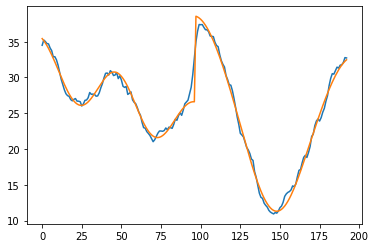

In [32]:
plt.plot(range(0,193),y_denoised)
plt.plot(range(0,193),x)

# Deblur using DTFT

In [33]:
# dtft algorithm for the denoised version of y[n]

N = len(y_denoised)                       
w = np.linspace(0,2*math.pi,N)              # taking 193 samples of w between 0 and 2*pi

X = np.zeros(N,dtype = 'complex_')          # array to store dtft

for k in range(0,N-1):                      # outer loop to change the value of k       
    X[k] = 0
    
    for n in range(0,N-1):                  # inner loop to change the value of n
        
        X[k] = X[k] + y_denoised[n]* math.e**(-1j *w[k] *n)               # formula for dtft

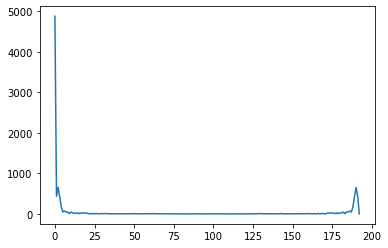

In [34]:
# plot for dtft
plt.plot(range(0,193),abs(X))

In [35]:
# dtft for h[n]

h = np.array([1/16, 1/4, 3/8, 1/4, 1/16])          # given

N = 193

w=[]
for i in range (193):                              # taking 193 samples of w between 0 and 2*pi
    w.append(2*math.pi*i/193)

H = np.zeros(N,dtype = 'complex_')

for k in range(0,N-1):                             # same dtft algorithm as above
    H[k-2] = 0                                     # replace k by 2-k since the middle value in h[n] corresponds to n = 0  
    
    for n in range(0,5):
        
        H[k-2] = H[k-2] + h[n]* math.e**(-1j *w[k-2] *n)

# Plot for DTFT of h[n]

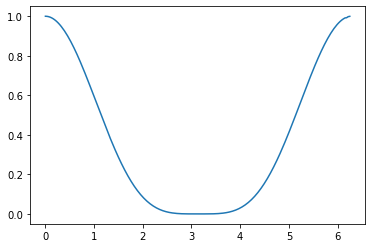

In [36]:
H[190] = (H[191] + H[189]) /2

plt.plot(range(0,193),abs(H))

In [37]:
# In the above plot we see that H(e^jw) approches zero at certain values and thus X_final(e^jw) may shoot to infinity.
# To avoid this senario we clip the graph at an appropriate value which is determined by trail and error and assign the same
# value to all the values below the threshold

H_mod = list(abs(H))

for n, i in enumerate(H_mod):
    if i < 0.8:
        H_mod[n] = 0.8

In [38]:
for i in range(22,172):          # assigns the given to all the numbers in this range
    
    H[i] = 0.15920910143656403-0.7716376423250288j
    

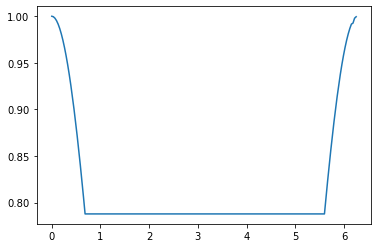

In [39]:
plt.plot(range(0,193),abs(H))

In [40]:
X_final = X/H                    # dtft for the X_final 

In [41]:
# using inverse fourier transform to convert X_final to X1:

N = len(X_final)
w = np.linspace(0,2*math.pi,N)             # taking 193 samples of w between 0 and 2*pi

X1 = np.zeros(N,dtype = 'complex_')

# Applying the summation formula for inverse dtft

for k in range(0,N-1):
    X1[k] = 0
    
    for n in range(0,N-1):
        
        X1[k] = ( X1[k] + X_final[n]* math.e**(1j * w[k] *n))
        
X1 = X1 / 193

# Final plot for X1[n] and comparision with original x[n]

<function matplotlib.pyplot.show(close=None, block=None)>

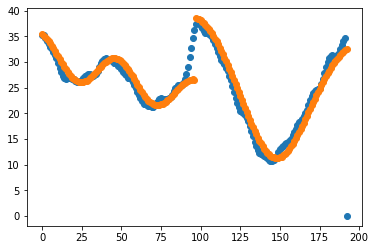

In [42]:
plt.scatter(range(0,193),abs(X1))
plt.scatter(range(0,193),x)
#plt.plot(w,y)

plt.show

# Orange plot represents original signal x[n]
# Blue plot represents X1[n]

In [43]:
# for comparing these plots we can calculate the mean error between all the values
# As the value of error decreases, accuracy of determining x[n] increases.

abs_error = []

for i in range(0,191):                              # excluding last 2 values since they are way off true value        
    abs_error.append(abs(X1[i]+x[i]))
    
mean_error = sum(abs_error)/191

print(mean_error)
    

50.57979074862414
